In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import learning_curve, train_test_split, GridSearchCV

from sklearn.metrics import roc_curve, auc

from imblearn.over_sampling import SMOTE


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from sklearn.preprocessing import StandardScaler

In [22]:
df= pd.read_csv('diabetes.csv')

Exploração dos dados

In [23]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [25]:
df.shape

(768, 9)

In [26]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
df.duplicated().sum()

0

In [28]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [29]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [30]:
df.nunique().sort_values()

Outcome                       2
Pregnancies                  17
BloodPressure                47
SkinThickness                51
Age                          52
Glucose                     136
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
dtype: int64

Visualização de dados

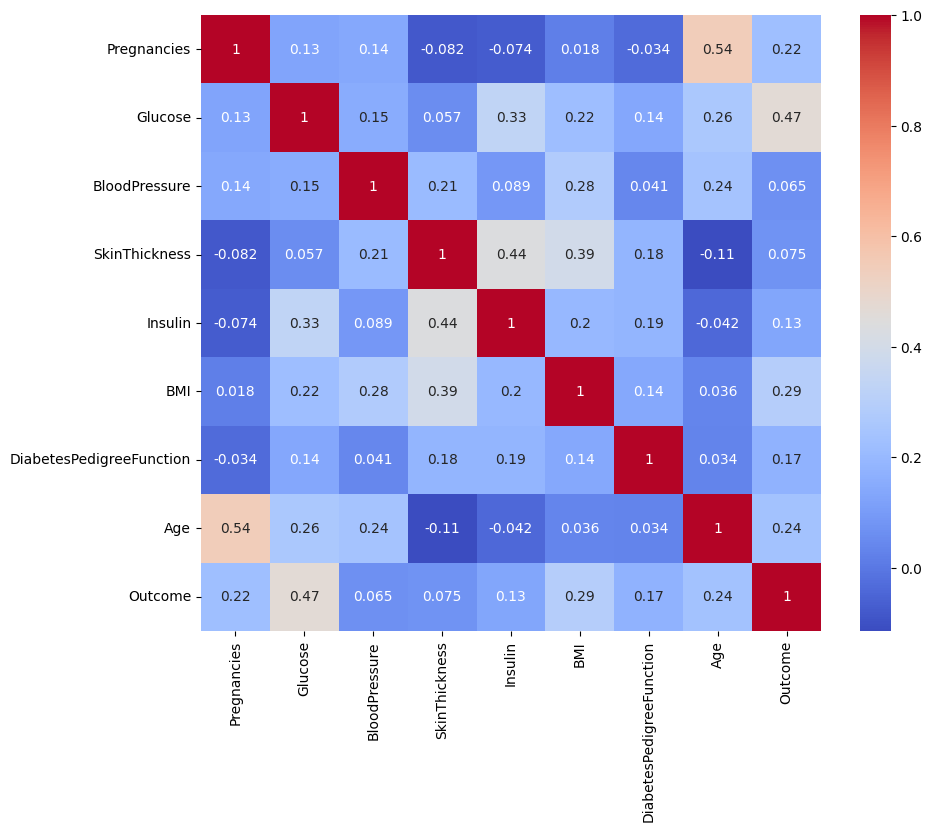

In [31]:
continuous_cols = df.select_dtypes(include='number').columns
correlation_matrix = df[continuous_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='Outcome', ylabel='count'>

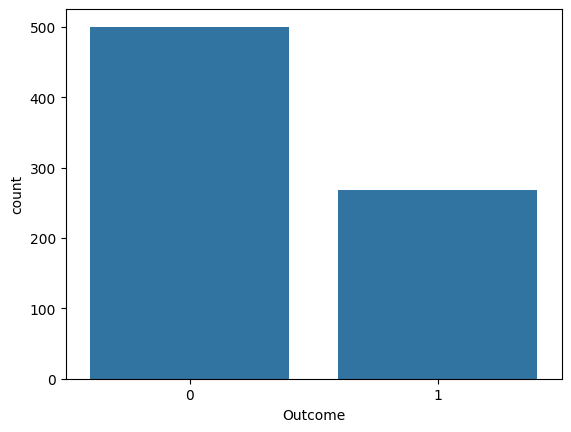

In [32]:
sns.countplot(x='Outcome',data=df)

<ipython-input-33-5ad90e15403f>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Pregnancies'] )


<Axes: title={'center': 'Distripution plot'}, xlabel='Pregnancies', ylabel='Density'>

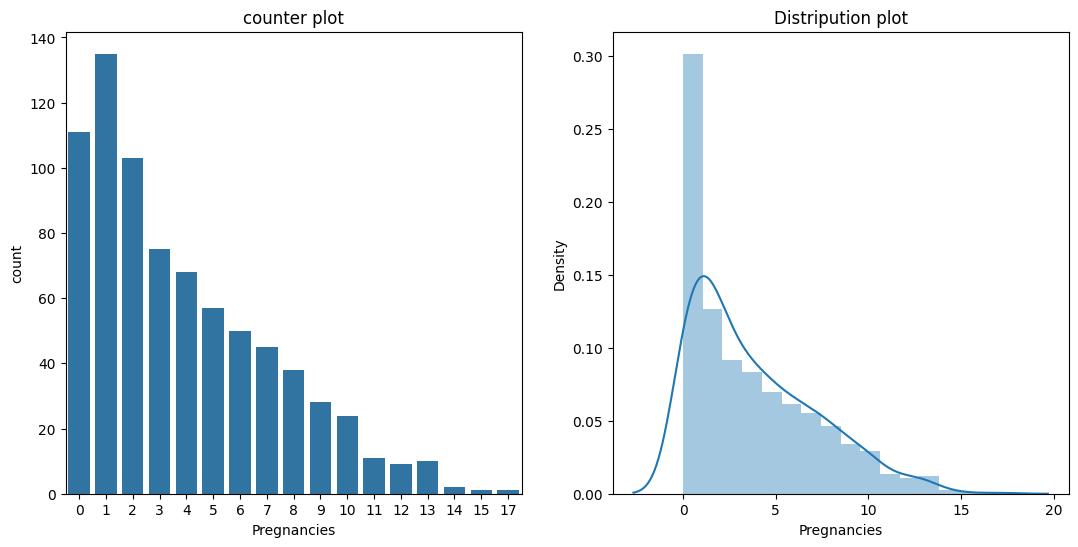

In [33]:
plt.figure(figsize =(20,6))
plt.subplot (1,3,1)
plt.title('counter plot')
sns.countplot(x='Pregnancies',data= df)

plt.subplot (1,3,2)
plt.title('Distripution plot')
sns.distplot(df['Pregnancies'] )


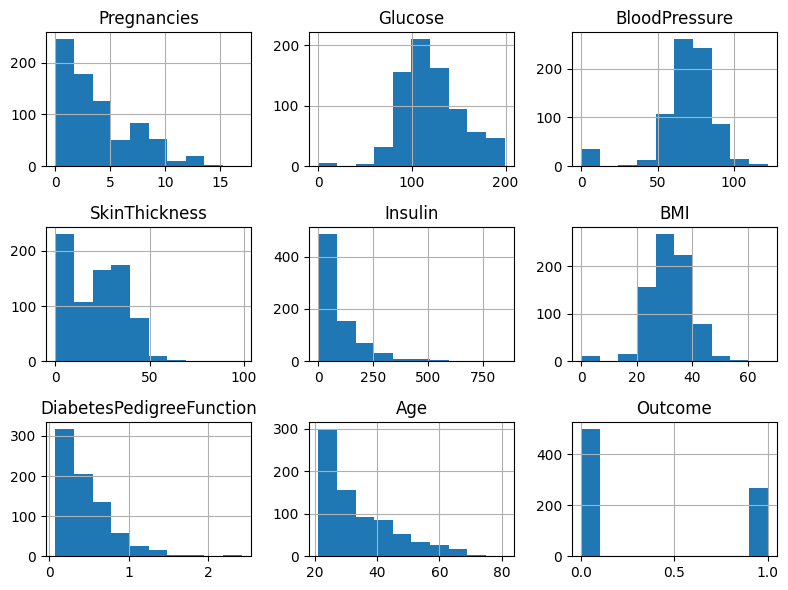

In [34]:
df.hist(figsize=(8,6))
plt.tight_layout()
plt.show()

Verificar Outlier de Pregnancies

In [35]:
dt_media, dt_desvio = np.mean(df['Pregnancies']), np.std(df['Pregnancies'])
corte = dt_desvio * 3
inf, sup = dt_media - corte, dt_media + corte
outliers = [x for x in df['Pregnancies'] if x < inf or x > sup]

In [36]:
outliers_idx = df[(df['Pregnancies'] < inf) | (df['Pregnancies'] > sup)].index

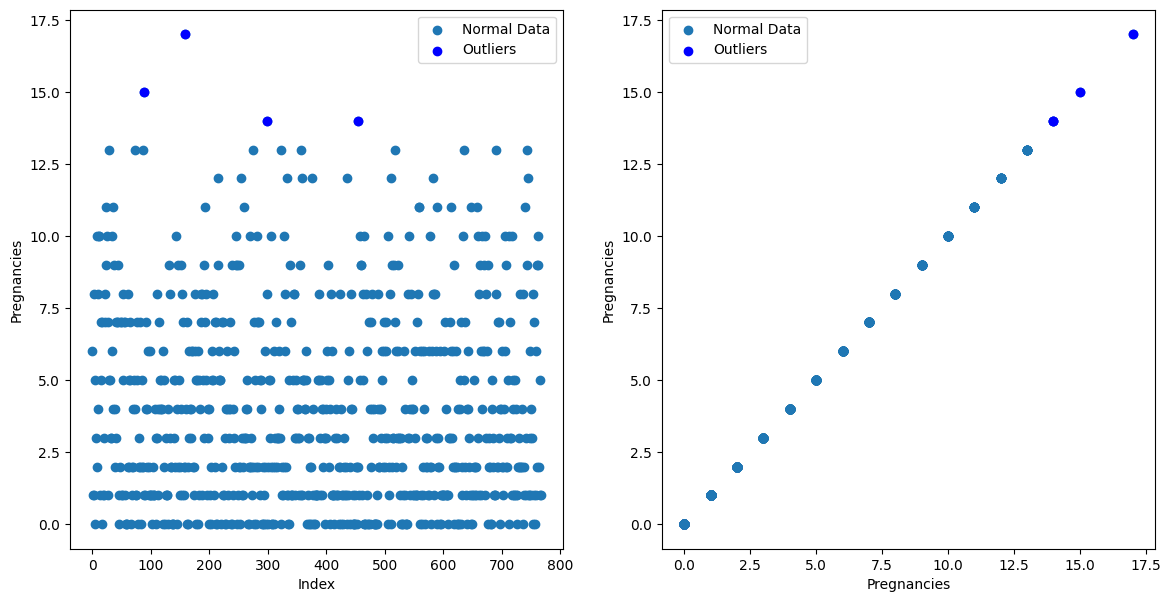

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))


axs[0].scatter(df.index, df['Pregnancies'], label='Normal Data')
axs[0].scatter(outliers_idx, df.loc[outliers_idx, 'Pregnancies'], color='blue', label='Outliers')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Pregnancies')
axs[0].legend()


axs[1].scatter(df['Pregnancies'], df['Pregnancies'], label='Normal Data')
axs[1].scatter(df.loc[outliers_idx, 'Pregnancies'], df.loc[outliers_idx, 'Pregnancies'], color='blue', label='Outliers')
axs[1].set_xlabel('Pregnancies')
axs[1].set_ylabel('Pregnancies')
axs[1].legend()

plt.show()

Tratar os outliers e substituir os valores pela mediana

In [38]:
mediana = df['Pregnancies'].median()

In [39]:
df.loc[outliers_idx, 'Pregnancies'] = mediana
print(df.loc[outliers_idx,'Pregnancies'])

88     3
159    3
298    3
455    3
Name: Pregnancies, dtype: int64


Verificar outliers de Glucose

In [40]:
dt_media, dt_desvio = np.mean(df['Glucose']), np.std(df['Glucose'])
corte = dt_desvio * 3
inf, sup = dt_media - corte, dt_media + corte
outliers = [x for x in df['Glucose'] if x < inf or x > sup]

In [41]:
outliers_idx = df[(df['Glucose'] < inf) | (df['Glucose'] > sup)].index

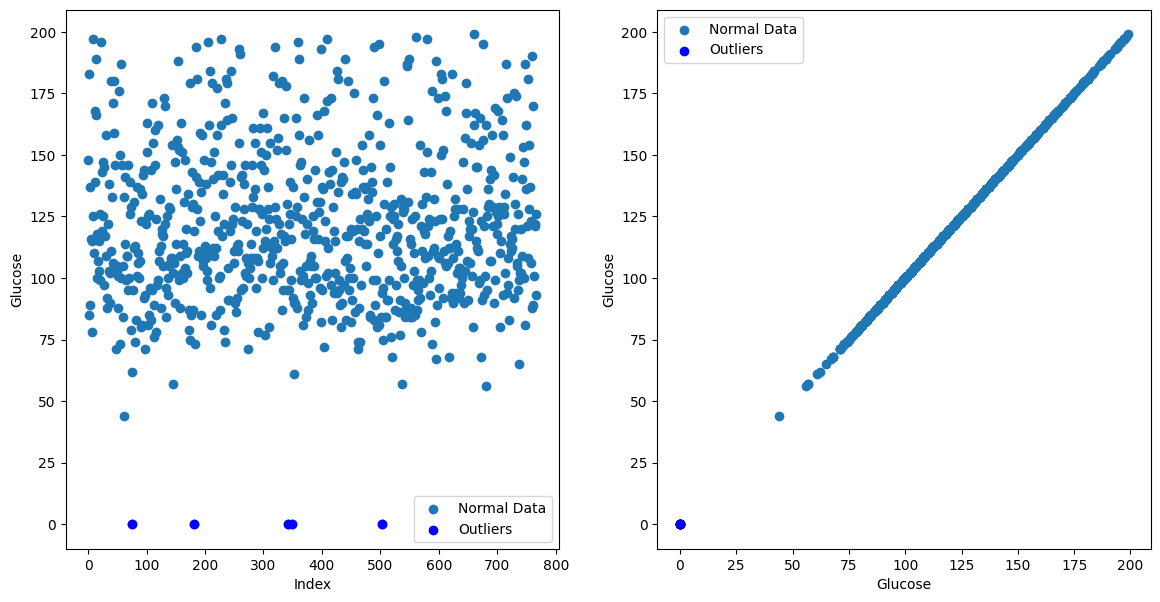

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))


axs[0].scatter(df.index, df['Glucose'], label='Normal Data')
axs[0].scatter(outliers_idx, df.loc[outliers_idx, 'Glucose'], color='blue', label='Outliers')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Glucose')
axs[0].legend()


axs[1].scatter(df['Glucose'], df['Glucose'], label='Normal Data')
axs[1].scatter(df.loc[outliers_idx, 'Glucose'], df.loc[outliers_idx, 'Glucose'], color='blue', label='Outliers')
axs[1].set_xlabel('Glucose')
axs[1].set_ylabel('Glucose')
axs[1].legend()

plt.show()

Tratar os outliers de Glucose alterando os outliers pela média arredondando o valor

In [43]:
mediaGlucose = np.floor(df['Glucose'].mean())

In [44]:
df.loc[outliers_idx, 'Glucose'] = mediaGlucose
print(df.loc[outliers_idx,'Glucose'])

75     120
182    120
342    120
349    120
502    120
Name: Glucose, dtype: int64


Verificar Outlier em BloodPressure

In [45]:
dt_media, dt_desvio = np.mean(df['BloodPressure']), np.std(df['BloodPressure'])
corte = dt_desvio * 3
inf, sup = dt_media - corte, dt_media + corte
outliers = [x for x in df['BloodPressure'] if x < inf or x > sup]

In [46]:
outliers_idx = df[(df['BloodPressure'] < inf) | (df['BloodPressure'] > sup)].index

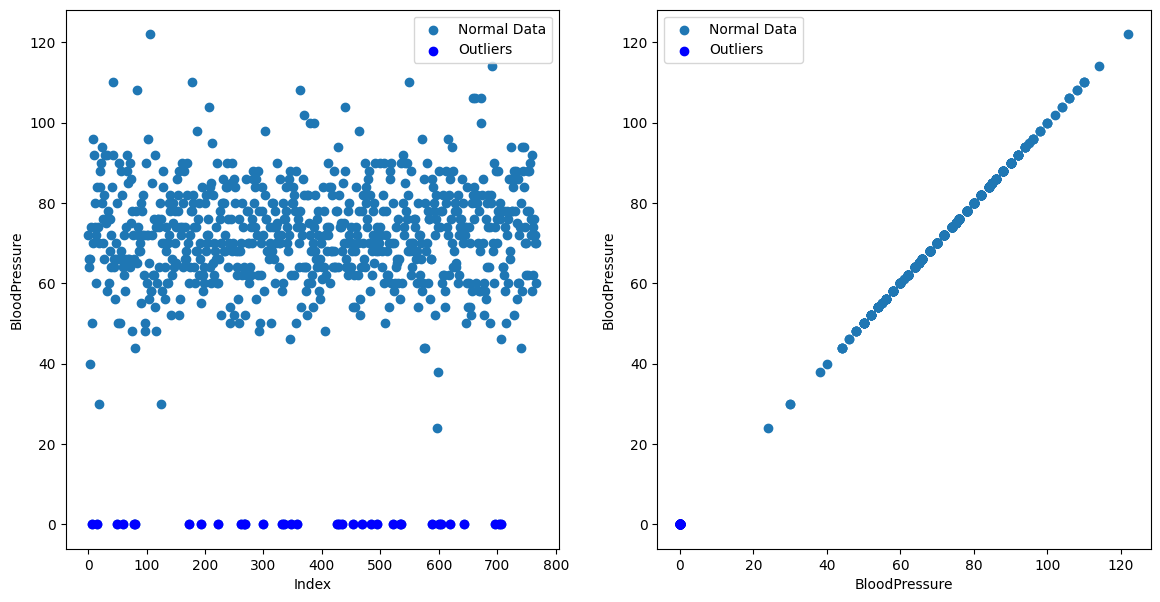

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Primeiro gráfico
axs[0].scatter(df.index, df['BloodPressure'], label='Normal Data')
axs[0].scatter(outliers_idx, df.loc[outliers_idx, 'BloodPressure'], color='blue', label='Outliers')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('BloodPressure')
axs[0].legend()

# Segundo gráfico
axs[1].scatter(df['BloodPressure'], df['BloodPressure'], label='Normal Data')
axs[1].scatter(df.loc[outliers_idx, 'BloodPressure'], df.loc[outliers_idx, 'BloodPressure'], color='blue', label='Outliers')
axs[1].set_xlabel('BloodPressure')
axs[1].set_ylabel('BloodPressure')
axs[1].legend()

plt.show()

Tratar os Outliers alterando para a mediana

In [48]:
medianaBloodPressure = np.floor(df['BloodPressure'].median())

In [49]:
df.loc[outliers_idx, 'BloodPressure'] = medianaBloodPressure
print(df.loc[outliers_idx,'BloodPressure'])

7      72
15     72
49     72
60     72
78     72
81     72
172    72
193    72
222    72
261    72
266    72
269    72
300    72
332    72
336    72
347    72
357    72
426    72
430    72
435    72
453    72
468    72
484    72
494    72
522    72
533    72
535    72
589    72
601    72
604    72
619    72
643    72
697    72
703    72
706    72
Name: BloodPressure, dtype: int64


Verificando Outlier na coluna SkinThickness

In [50]:
dt_media, dt_desvio = np.mean(df['SkinThickness']), np.std(df['SkinThickness'])
corte = dt_desvio * 3
inf, sup = dt_media - corte, dt_media + corte
outliers = [x for x in df['SkinThickness'] if x < inf or x > sup]

In [51]:
outliers_idx = df[(df['SkinThickness'] < inf) | (df['SkinThickness'] > sup)].index

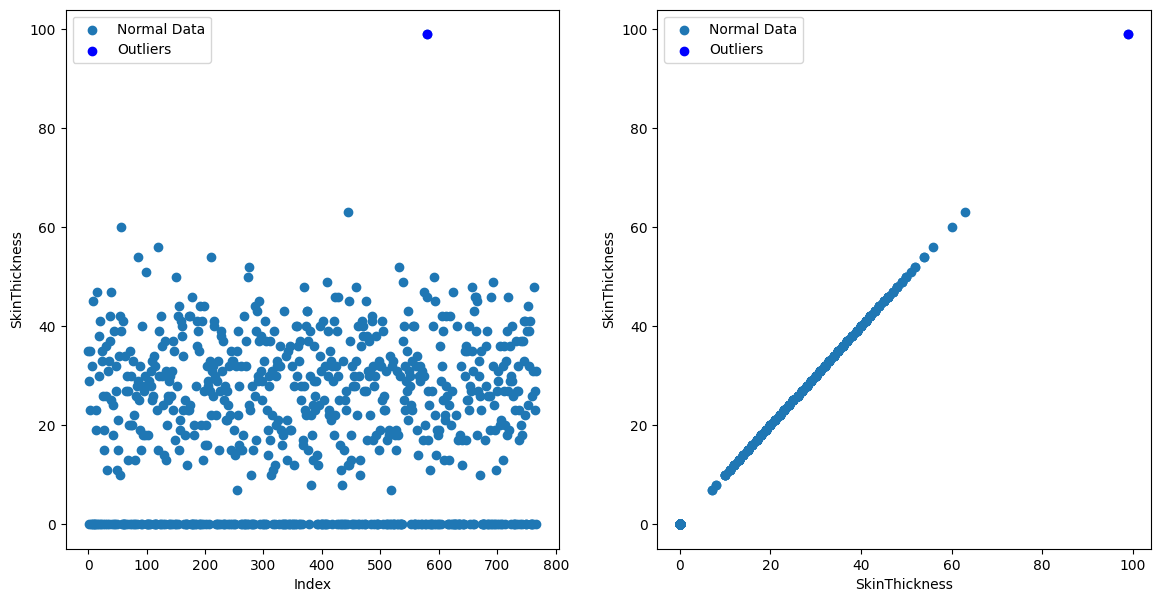

In [52]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].scatter(df.index, df['SkinThickness'], label='Normal Data')
axs[0].scatter(outliers_idx, df.loc[outliers_idx, 'SkinThickness'], color='blue', label='Outliers')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('SkinThickness')
axs[0].legend()

axs[1].scatter(df['SkinThickness'], df['SkinThickness'], label='Normal Data')
axs[1].scatter(df.loc[outliers_idx, 'SkinThickness'], df.loc[outliers_idx, 'SkinThickness'], color='blue', label='Outliers')
axs[1].set_xlabel('SkinThickness')
axs[1].set_ylabel('SkinThickness')
axs[1].legend()

plt.show()

Tratar o outlier para a mediana e alterar os valores 0 para a mediana também, pois espessura de pele não tem como ser 0

In [53]:
if df['SkinThickness'].min() < 1:
    df.loc[outliers_idx, 'SkinThickness'] = df['SkinThickness'].median()

In [54]:
medianaSkinThickness = np.floor(df['SkinThickness'].median())

In [55]:
df.loc[outliers_idx, 'SkinThickness'] = medianaSkinThickness
print(df.loc[outliers_idx,'SkinThickness'])

579    23
Name: SkinThickness, dtype: int64


Verificanto outlier na coluna Insulin

In [56]:
dt_media, dt_desvio = np.mean(df['Insulin']), np.std(df['Insulin'])
corte = dt_desvio * 3
inf, sup = dt_media - corte, dt_media + corte
outliers = [x for x in df['Insulin'] if x < inf or x > sup]

In [57]:
outliers_idx = df[(df['Insulin'] < inf) | (df['Insulin'] > sup)].index

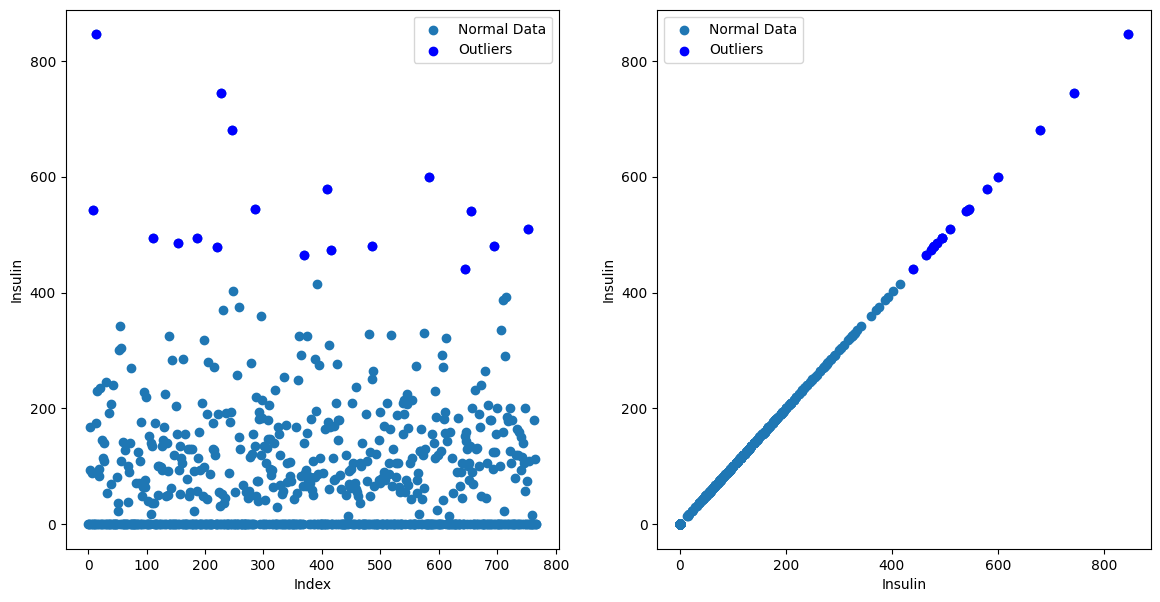

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].scatter(df.index, df['Insulin'], label='Normal Data')
axs[0].scatter(outliers_idx, df.loc[outliers_idx, 'Insulin'], color='blue', label='Outliers')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Insulin')
axs[0].legend()

axs[1].scatter(df['Insulin'], df['Insulin'], label='Normal Data')
axs[1].scatter(df.loc[outliers_idx, 'Insulin'], df.loc[outliers_idx, 'Insulin'], color='blue', label='Outliers')
axs[1].set_xlabel('Insulin')
axs[1].set_ylabel('Insulin')
axs[1].legend()

plt.show()

Tratando os outliers para o valor do terceiro Quartil pois os valores precisam se manter altos

In [59]:
terceiro_quartil = np.floor(df['Insulin'].quantile(0.75))

In [60]:
df.loc[outliers_idx, 'Insulin'] = terceiro_quartil
print(df.loc[outliers_idx,'Insulin'])

8      127
13     127
111    127
153    127
186    127
220    127
228    127
247    127
286    127
370    127
409    127
415    127
486    127
584    127
645    127
655    127
695    127
753    127
Name: Insulin, dtype: int64


Verificar outlier na coluna BMI

In [61]:
dt_media, dt_desvio = np.mean(df['BMI']), np.std(df['BMI'])
corte = dt_desvio * 3
inf, sup = dt_media - corte, dt_media + corte
outliers = [x for x in df['BMI'] if x < inf or x > sup]

In [62]:
outliers_idx = df[(df['BMI'] < inf) | (df['BMI'] > sup)].index

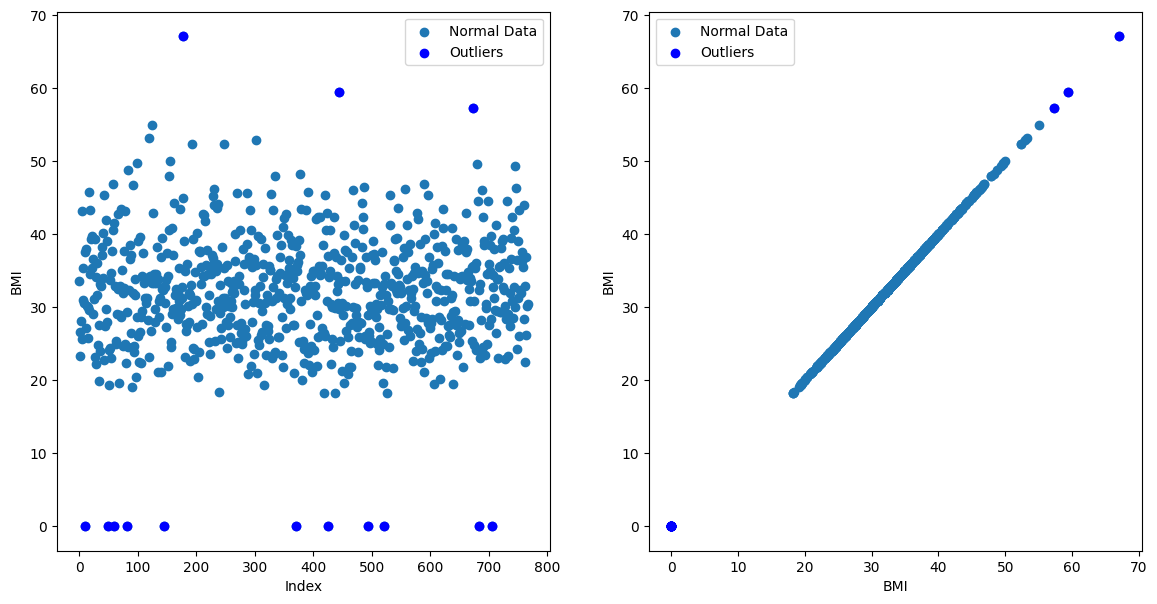

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].scatter(df.index, df['BMI'], label='Normal Data')
axs[0].scatter(outliers_idx, df.loc[outliers_idx, 'BMI'], color='blue', label='Outliers')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('BMI')
axs[0].legend()

axs[1].scatter(df['BMI'], df['BMI'], label='Normal Data')
axs[1].scatter(df.loc[outliers_idx, 'BMI'], df.loc[outliers_idx, 'BMI'], color='blue', label='Outliers')
axs[1].set_xlabel('BMI')
axs[1].set_ylabel('BMI')
axs[1].legend()

plt.show()

Foi visto que na verdade a quantidade de dados erronêos em 0 está alterando os valores de outlier, então tratamos os valores 0 para a mediana

In [64]:
if df['BMI'].min() < 18.5:
    df.loc[outliers_idx, 'BMI'] = df['BMI'].median()

Verificando Outlier da coluna DiabetesPedigreeFunction

In [65]:
dt_media, dt_desvio = np.mean(df['DiabetesPedigreeFunction']), np.std(df['DiabetesPedigreeFunction'])
corte = dt_desvio * 3
inf, sup = dt_media - corte, dt_media + corte
outliers = [x for x in df['DiabetesPedigreeFunction'] if x < inf or x > sup]

In [66]:
outliers_idx = df[(df['DiabetesPedigreeFunction'] < inf) | (df['DiabetesPedigreeFunction'] > sup)].index

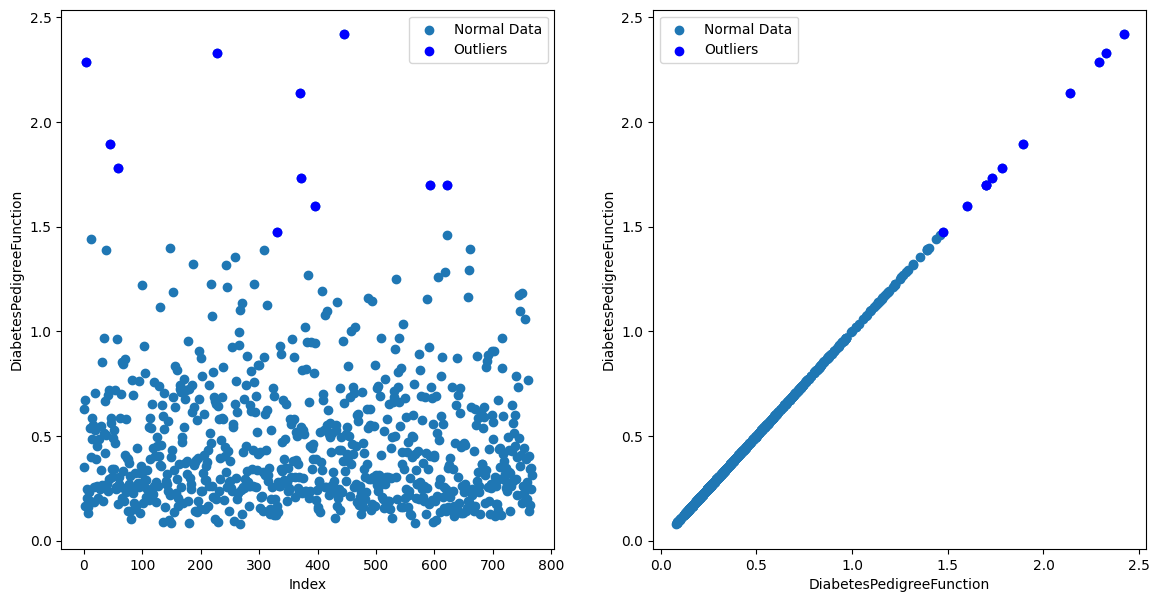

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))


axs[0].scatter(df.index, df['DiabetesPedigreeFunction'], label='Normal Data')
axs[0].scatter(outliers_idx, df.loc[outliers_idx, 'DiabetesPedigreeFunction'], color='blue', label='Outliers')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('DiabetesPedigreeFunction')
axs[0].legend()


axs[1].scatter(df['DiabetesPedigreeFunction'], df['DiabetesPedigreeFunction'], label='Normal Data')
axs[1].scatter(df.loc[outliers_idx, 'DiabetesPedigreeFunction'], df.loc[outliers_idx, 'DiabetesPedigreeFunction'], color='blue', label='Outliers')
axs[1].set_xlabel('DiabetesPedigreeFunction')
axs[1].set_ylabel('DiabetesPedigreeFunction')
axs[1].legend()

plt.show()

Tratar os Outliers para a mediana

In [68]:
medianaDiabetesPedigree = df['DiabetesPedigreeFunction'].median()

In [69]:
df.loc[outliers_idx, 'DiabetesPedigreeFunction'] = medianaDiabetesPedigree
print(df.loc[outliers_idx,'DiabetesPedigreeFunction'])

4      0.3725
45     0.3725
58     0.3725
228    0.3725
330    0.3725
370    0.3725
371    0.3725
395    0.3725
445    0.3725
593    0.3725
621    0.3725
Name: DiabetesPedigreeFunction, dtype: float64


Verificando Outlier na coluna Age

In [70]:
dt_media, dt_desvio = np.mean(df['Age']), np.std(df['Age'])
corte = dt_desvio * 3
inf, sup = dt_media - corte, dt_media + corte
outliers = [x for x in df['Age'] if x < inf or x > sup]

In [71]:
outliers_idx = df[(df['Age'] < inf) | (df['Age'] > sup)].index

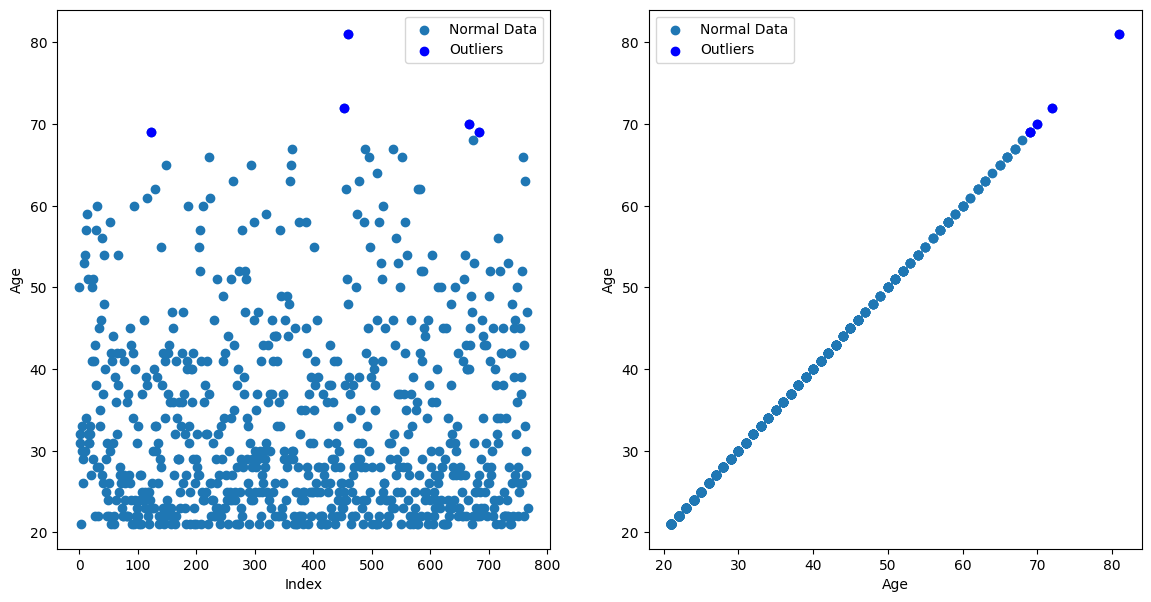

In [72]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

axs[0].scatter(df.index, df['Age'], label='Normal Data')
axs[0].scatter(outliers_idx, df.loc[outliers_idx, 'Age'], color='blue', label='Outliers')
axs[0].set_xlabel('Index')
axs[0].set_ylabel('Age')
axs[0].legend()

axs[1].scatter(df['Age'], df['Age'], label='Normal Data')
axs[1].scatter(df.loc[outliers_idx, 'Age'], df.loc[outliers_idx, 'Age'], color='blue', label='Outliers')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Age')
axs[1].legend()

plt.show()

Por se tratar de idade e não ter nenhum valor muito discrepante (como mais de 120 anos) então não será alterado os valores

Criar o modelo

In [73]:
df['Glucose_BMI'] = df['Glucose'] * df['BMI']
df['Glucose_Age'] = df['Glucose'] * df['Age']
df['BMI_Age'] = df['BMI'] * df['Age']

In [74]:
X=df.drop('Outcome', axis=1)
y= df['Outcome']

In [75]:
#important_features = ["Glucose", "BMI", "Age", "Pregnancies"]

In [76]:
#X_important = X[important_features]

In [77]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=.2)

SMOTE

In [78]:
#ros = RandomOverSampler(random_state=42)
#X_ros,y_ros = ros.fit_resample(X,y)

smote = SMOTE(random_state=42)
X_ros,y_ros = smote.fit_resample(X,y)

<Axes: xlabel='Outcome', ylabel='count'>

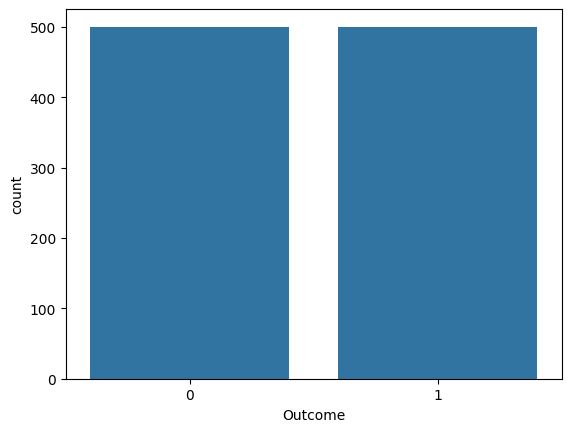

In [79]:
sns.countplot(data=df,x=y_ros)

In [80]:
X_trainOver, X_testOver, y_trainOver, y_testOver = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

In [81]:
scaler = StandardScaler()
X_trainOver = scaler.fit_transform(X_trainOver)
X_testOver = scaler.transform(X_testOver)

Rede Neural FFN

In [82]:
modeloSequencial = Sequential([
Dense(64,activation='relu',name='a1',input_shape=(X_trainOver.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
Dense(32,activation='relu',name='a2',kernel_regularizer=regularizers.l2(0.01)),
Dense(1,activation='sigmoid',name='a3',kernel_regularizer=regularizers.l2(0.01))
])

In [83]:
modeloSequencial.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001),
    metrics=['accuracy']

)

In [84]:
modeloSequencial.fit(X_trainOver, y_trainOver,
          epochs=75,
          batch_size=32
         )

Epoch 1/75
25/25 [==============================] - 1s 5ms/step - loss: 1.2097 - accuracy: 0.6413
Epoch 2/75
25/25 [==============================] - 0s 2ms/step - loss: 1.0471 - accuracy: 0.7200
Epoch 3/75
25/25 [==============================] - 0s 2ms/step - loss: 0.9419 - accuracy: 0.7287
Epoch 4/75
25/25 [==============================] - 0s 3ms/step - loss: 0.8624 - accuracy: 0.7350
Epoch 5/75
25/25 [==============================] - 0s 3ms/step - loss: 0.8017 - accuracy: 0.7437
Epoch 6/75
25/25 [==============================] - 0s 4ms/step - loss: 0.7524 - accuracy: 0.7462
Epoch 7/75
25/25 [==============================] - 0s 3ms/step - loss: 0.7119 - accuracy: 0.7563
Epoch 8/75
25/25 [==============================] - 0s 3ms/step - loss: 0.6790 - accuracy: 0.7600
Epoch 9/75
25/25 [==============================] - 0s 4ms/step - loss: 0.6531 - accuracy: 0.7675
Epoch 10/75
25/25 [==============================] - 0s 4ms/step - loss: 0.6294 - accuracy: 0.7738
Epoch 11/75
25/25 [

In [85]:

y_predOver = modeloSequencial.predict(X_testOver)
for i in range(len(y_predOver)):
    if y_predOver[i]>=0.5:
        y_predOver[i]= 1
    else:
        y_predOver[i]= 0

7/7 [==============================] - 0s 4ms/step


In [86]:
print("Acuracia:", accuracy_score(y_testOver, y_predOver))
print("Matriz de confusão:")
print(confusion_matrix(y_testOver, y_predOver))
print("Relatório de classificação:")
print(classification_report(y_testOver, y_predOver))

Acuracia: 0.79
Matriz de confusão:
[[71 28]
 [14 87]]
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.84      0.72      0.77        99
           1       0.76      0.86      0.81       101

    accuracy                           0.79       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.79      0.79       200



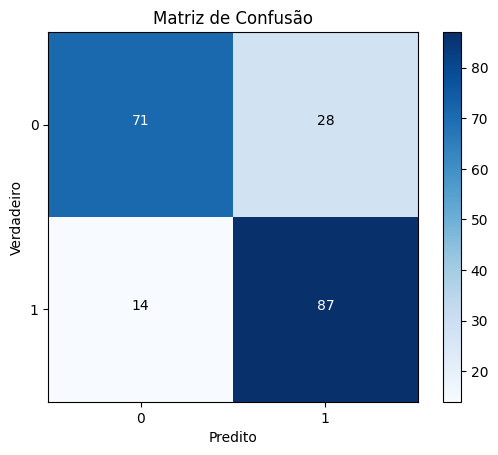

In [87]:
cm = confusion_matrix(y_testOver, y_predOver)

# Plotar a matriz de confusão
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
classes = np.unique(y_testOver)
plt.xticks(classes, [str(i) for i in classes])
plt.yticks(classes, [str(i) for i in classes])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')

# Adicionar os valores dentro dos quadrados
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

plt.show()

7/7 [==============================] - 0s 3ms/step


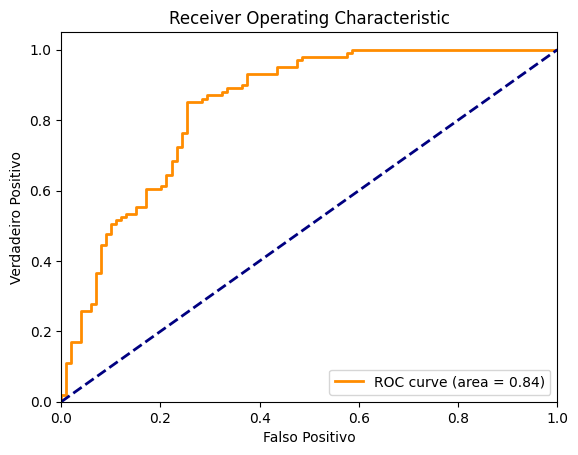

In [88]:
y_pred_proba = modeloSequencial.predict(X_testOver)

# Calcule a curva ROC
fpr, tpr, thresholds = roc_curve(y_testOver, y_pred_proba)

# Calcule a AUC
roc_auc = auc(fpr, tpr)

# Plote a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [89]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

Epoch 1/50
25/25 [==============================] - 1s 21ms/step - loss: 0.5000 - accuracy: 0.8000 - val_loss: 0.5502 - val_accuracy: 0.7950
Epoch 2/50
25/25 [==============================] - 0s 5ms/step - loss: 0.5000 - accuracy: 0.8100 - val_loss: 0.5512 - val_accuracy: 0.7850
Epoch 3/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4995 - accuracy: 0.8037 - val_loss: 0.5499 - val_accuracy: 0.7900
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4994 - accuracy: 0.8050 - val_loss: 0.5496 - val_accuracy: 0.7900
Epoch 5/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4977 - accuracy: 0.8062 - val_loss: 0.5495 - val_accuracy: 0.7900
Epoch 6/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4993 - accuracy: 0.8025 - val_loss: 0.5514 - val_accuracy: 0.7850
Epoch 7/50
25/25 [==============================] - 0s 6ms/step - loss: 0.4980 - accuracy: 0.8062 - val_loss: 0.5499 - val_accuracy: 0.7850
Epoch 8/50
25/25 [=

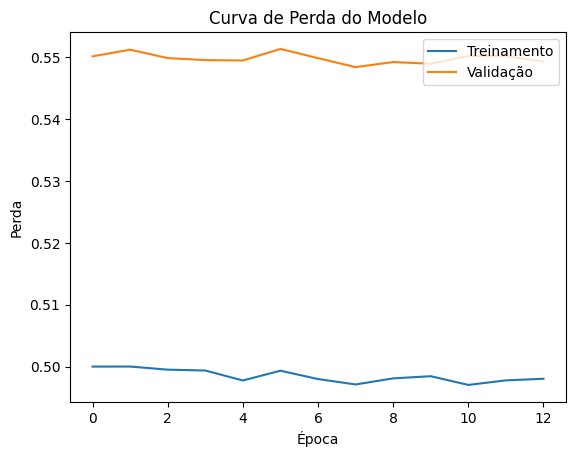

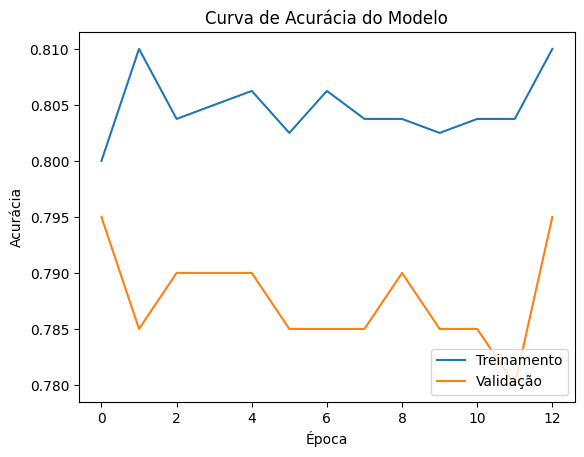

In [90]:
history = modeloSequencial.fit(X_trainOver, y_trainOver, epochs=50, validation_data=(X_testOver, y_testOver), callbacks=[early_stopping])

# Plotando a perda (loss)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Curva de Perda do Modelo')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='upper right')
plt.show()

# Plotando a acurácia
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Curva de Acurácia do Modelo')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'], loc='lower right')
plt.show()